# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [12]:
data = data[:10000]

In [13]:
data.comment_class.unique()

array([-1,  1], dtype=int64)

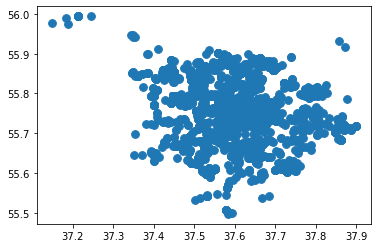

In [14]:
plt.scatter(data.x, data.y, cmap='autumn', s=60)

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [16]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data.x.values.reshape(-1,1))
clusters

array([0, 0, 0, ..., 0, 0, 0])

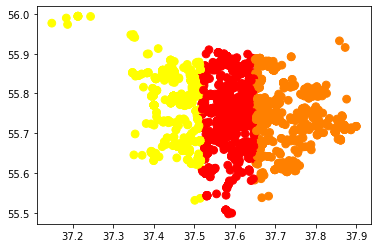

In [17]:
plt.scatter(data.x, data.y, cmap='autumn', c=clusters, s=60)

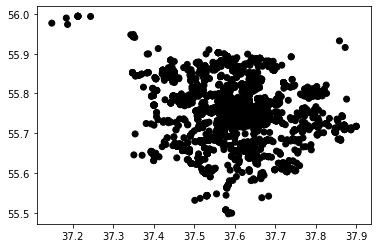

In [18]:
clustering2 = DBSCAN(eps=3, min_samples=2).fit_predict(data[['x', 'y']])
plt.scatter(data.x, data.y, c=clustering2,  cmap='gray')

скопление голосов за и против

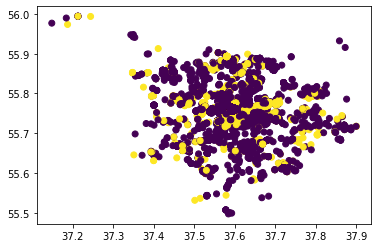

In [19]:
plt.scatter(data.x, data.y, c=data.comment_class)
plt.show()

In [20]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data.x.values.reshape(-1,1), )
    k_inertia.append(clf_kmeans.inertia_)

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$

In [21]:
diff = np.diff(k_inertia)

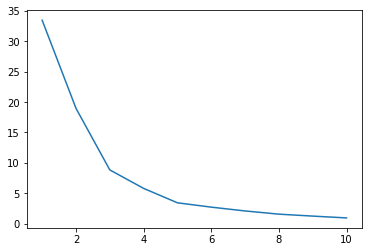

In [22]:
plt.plot(ks, k_inertia)

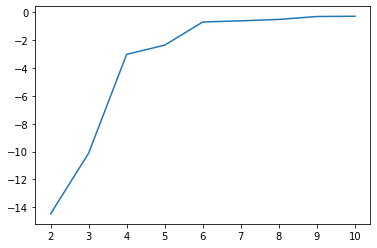

In [23]:
plt.plot(ks[1:], diff)

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [24]:
diff_r = diff[1:] / diff[:-1]

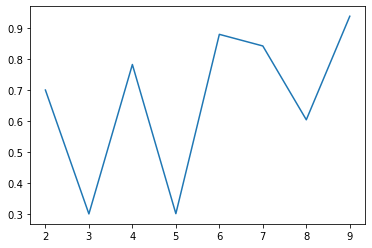

In [25]:
plt.plot(ks[1:-1], diff_r)

In [26]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3